In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from distutils.dir_util import copy_tree, remove_tree
import pandas as pd
from imblearn.combine import SMOTEENN 
from keras_preprocessing.image import ImageDataGenerator as ImgDataGenerator
import numpy as np

## 1) Déclaration Arborescence


In [2]:
INPUT_DIR = "Data/Alzheimer_s Dataset/"
BASE_TRAIN_DIR = INPUT_DIR + "train/"

SAVE_DIR = "FiltrageMedian/"
isExist = os.path.exists(SAVE_DIR)
if not isExist:
   os.makedirs(SAVE_DIR)


train_path = BASE_TRAIN_DIR

## 2) Chargement des images (trainX) et leur étiquettage (trainY0)

In [3]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory(train_path,  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], target_size=(64,64),
                                     subset='training',
                                     batch_size=10000)
trainX, trainY0  = train_batches.next()
#### STANDARISATION #####
trainX= trainX/255

Found 4610 images belonging to 4 classes.


In [4]:
print("Y est en hot encoder avec 4 colonnes, une pour chaque classe")
display(trainY0)
print("#### Concatémer le multi values en  colonne  #####")
s = pd.DataFrame(trainY0)
y = pd.get_dummies(s).idxmax(1)
trainY = y.to_numpy()
display(trainY)

Y est en hot encoder avec 4 colonnes, une pour chaque classe


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

#### Concatémer le multi values en  colonne  #####


array([0, 1, 2, ..., 0, 0, 0], dtype=int64)

## 3) Filtrage

In [5]:
import cv2
import argparse

#https://www.kaggle.com/code/natigmamishov/complete-guide-to-image-processing-with-opencv
#funtion for mean filter/blur

def plot_image(image_1, image_2, title_1="Orignal", title_2="New Image"):
    
    #6/6 inch figure
    width_inch = 8
    height_inch = 5
    plt.figure(figsize=(width_inch, height_inch))
    row = 1
    column = 2
    
    position = 1
    plt.subplot(row, column, position)
    plt.imshow(image_1)
    plt.title(title_1)
    
    position = 2
    plt.subplot(row, column, position)
    plt.imshow(image_2)
    plt.title(title_2)
            
    #save the image
    filter_img_name = title_1 + '.png'
    filter_img_name = SAVE_DIR + filter_img_name.replace(': Original', '')
    print(filter_img_name)
    plt.savefig(filter_img_name, dpi=100)
    
    #show the image
    plt.show()
    
def mean_blur(img, image_name, target_folder, kernel=(5, 5)):
    image = cv2.imread(img)
    processed_image = cv2.blur(image, kernel)    
    #cv2.filter2D(image,-1,kernel) = cv2.filter2D(image,-1,kernel)
    writing_path = PRE_PRO_DIR + target_folder + '/' + image_name;
    #print(writing_path)
    cv2.imwrite(writing_path, processed_image)
    #plot_image(image, processed_image)
    
    #return blur
    
#https://www.kaggle.com/code/natigmamishov/complete-guide-to-image-processing-with-opencv   
#funtion for mean filter/blur
def do_median_blur(img, image_name, target_folder, ksize = 3):
    image = cv2.imread(img)
    processed_image = cv2.medianBlur(image, ksize)
    processed_image = cv2.bilateralFilter(image, 15, 75, 75)
    writing_path = PRE_PRO_DIR + target_folder + '/' + image_name;
    # print(writing_path)
    cv2.imwrite(writing_path, processed_image)
    
    #Images to plot
    img_list = ['mildDem116.jpg', 'moderateDem1.jpg', 'nonDem84.jpg', 'verymildDem56.jpg']
    #print(image_name)
    if image_name in img_list:
        plot_image(image, processed_image, title_1 = target_folder + ": Original", title_2 = target_folder + ": Processed") 
        
#https://www.tutorialspoint.com/python_pillow/python_pillow_adding_filters_to_an_image.htm   
#funtion for DETAIL and EDGE_ENHANCE

#Import required image modules
from PIL import Image, ImageFilter

def detail_and_edge_enhance(img, image_name, target_folder):      
    
    org_image = cv2.imread(img)
    writing_path = PRE_PRO_DIR + target_folder + '/' + image_name;
    #print(writing_path)
    
    #Import all the enhancement filter from pillow
    from PIL.ImageFilter import (
       BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
       EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
    )
    
    #Create image object
    image = Image.open(img) 
    
    #Applying the blur filter DETAIL
    #image1 = image.filter(DETAIL)
    
    #Applying the blur filter EDGE_ENHANCE
    #image2 = image.filter(EDGE_ENHANCE)
    
    #Applying the blur filter SHARPEN
    processed_image = image.filter(SHARPEN)
    
    #save the image
    processed_image.save(writing_path)
    
    #Images to plot
    img_list = ['mildDem116.jpg', 'moderateDem1.jpg', 'nonDem84.jpg', 'verymildDem56.jpg']
    #print(image_name)
    if image_name in img_list:
        plot_image(org_image, processed_image, title_1 = target_folder + ": Original", title_2 = target_folder + ": Processed")  



NonDemented
FiltrageMedian/NonDemented.png


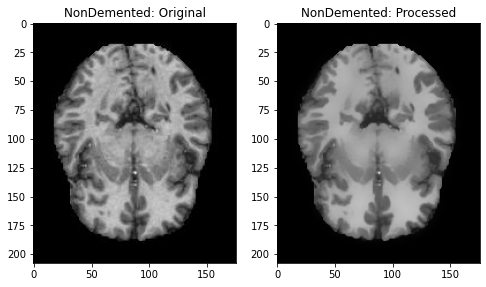

VeryMildDemented
FiltrageMedian/VeryMildDemented.png


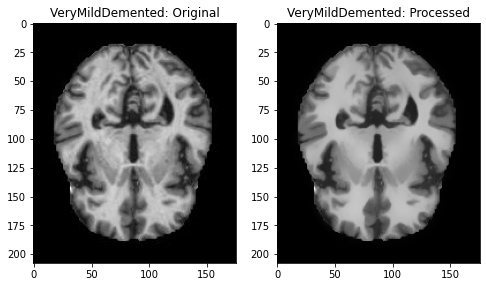

MildDemented
FiltrageMedian/MildDemented.png


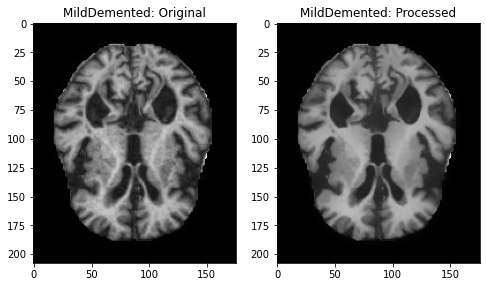

ModerateDemented
FiltrageMedian/ModerateDemented.png


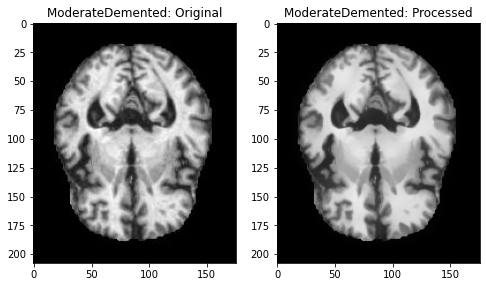

In [6]:
PRE_PRO_DIR = "pre_pro_dataset/"
COPY_DIR = train_path

#call for preprocessing
if os.path.exists(PRE_PRO_DIR):
    remove_tree(PRE_PRO_DIR)
os.mkdir(PRE_PRO_DIR)

CLASSES = [ 'NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
for img_class in CLASSES:
    target_folder = img_class
    print(img_class) 
    os.mkdir(PRE_PRO_DIR + target_folder)
    for dirname, _, filenames in os.walk(COPY_DIR + target_folder):
        for filename in filenames:
            do_median_blur(os.path.join(dirname, filename), filename, target_folder)

## 4) Balancement

In [7]:
#Image Resize
IMG_SIZE_X = 128
IMG_SIZE_Y = 128
TARGET_SIZE = (IMG_SIZE_X, IMG_SIZE_Y)
train_ds_datagen = ImgDataGenerator(rescale = 1./255)
train_ds_generator = train_ds_datagen.flow_from_directory(PRE_PRO_DIR, target_size = (IMG_SIZE_X, IMG_SIZE_Y), batch_size=6500, shuffle=False)

#Retrieving the data from the ImageDataGenerator iterator
TrainImagesGenerated, TrainLabelsGenerated = train_ds_generator.next()
print("Training data retrived.")
print(TrainImagesGenerated.shape, TrainLabelsGenerated.shape)

Found 5121 images belonging to 4 classes.
Training data retrived.
(5121, 128, 128, 3) (5121, 4)


In [8]:
#Performing over-sampling/under-sampling of the data, since the classes are imbalanced

#over_sampling = SMOTE(random_state=42)
over_under_sampling = SMOTEENN()

train_data, train_labels = over_under_sampling.fit_resample(TrainImagesGenerated.reshape(-1, IMG_SIZE_X * IMG_SIZE_Y * 3), TrainLabelsGenerated)
train_data = train_data.reshape(-1, IMG_SIZE_X, IMG_SIZE_Y, 3)

#To skip the over/under sampling upper two lines are commented and below two lines are written
#train_data = TrainImagesGenerated
#train_labels = TrainLabelsGenerated

#Dimensions of the over/under sampled dataset
print("Final dimension of data")
print(train_data.shape, train_labels.shape)

Final dimension of data
(10124, 128, 128, 3) (10124, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

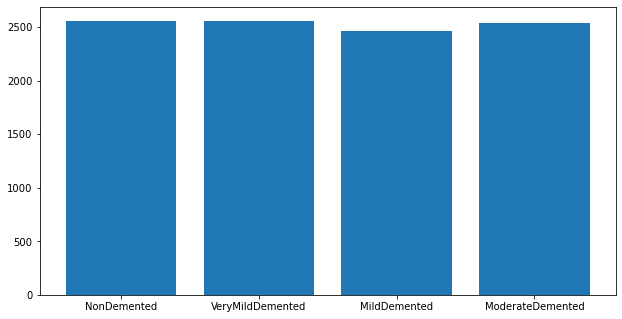

In [9]:
c = np.argmax(train_labels,axis=1)
a,b = np.unique(c,return_counts=True)
b 
#plot the samples count
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
size = b
ax.bar(CLASSES,size)

#save plot
plt.savefig(SAVE_DIR + "samples_count.png", bbox_inches = 'tight')

#show plot
plt.show